*Importining all necessary libaries and tuning some global settings.*

In [1]:
import numpy as np  # For vector/matrix calculations.
import matplotlib  # For plotting.
import matplotlib.pyplot as plt  # (ditto).
from tqdm.notebook import tqdm  # For displaying a progress bar.

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 12]
matplotlib.rc('font', size=14)

# Implementation

In [11]:
def update(array, p=0.03, q=0.3):
    """Update the array (containing 0 or 1 values) and return a new one without mutating the original."""
    array = array.copy()  # To not mutate the input.
    
    # Count the influenced and not influenced elements.
    n_influenced = int(sum(array))
    n_not_influenced = int(len(array) - n_influenced)
    
    # Set the counters for new innovators and imitators.
    n_innovators = 0
    n_imitators = 0
    
    # Iterate over not influenced.
    for i in range(n_not_influenced):
        # If it is an innovator.
        if np.random.rand() < p:
            n_not_influenced -= 1
            n_influenced += 1
            n_innovators += 1
        # If it is an imitator.
        elif p <= np.random.rand() < q * n_influenced / len(array):
            n_not_influenced -= 1
            n_influenced += 1
            n_imitators += 1
          
    return np.concatenate([np.ones(n_influenced), np.zeros(n_not_influenced)]), n_innovators, n_imitators

# Simulation

In [19]:
SIZE = 1000
MAX_TIME = 25
MC_ITER = 5

In [20]:
n_influenced, n_innovators, n_imitators = np.zeros(MAX_TIME), np.zeros(MAX_TIME), np.zeros(MAX_TIME)
for _ in tqdm(range(MC_ITER)):
    field = np.zeros(SIZE)
    mc_n_influenced, mc_n_innovators, mc_n_imitators = [], [], []
    for t in range(MAX_TIME):
        field, innovators, imitators = update(field, 0.03, 0.3)
        mc_n_influenced.append(field.sum())
        mc_n_innovators.append(innovators)
        mc_n_imitators.append(imitators)
    n_influenced += np.array(mc_n_influenced) / MC_ITER
    n_innovators += np.array(mc_n_innovators) / MC_ITER
    n_imitators += np.array(mc_n_imitators) / MC_ITER
    

# Visualization

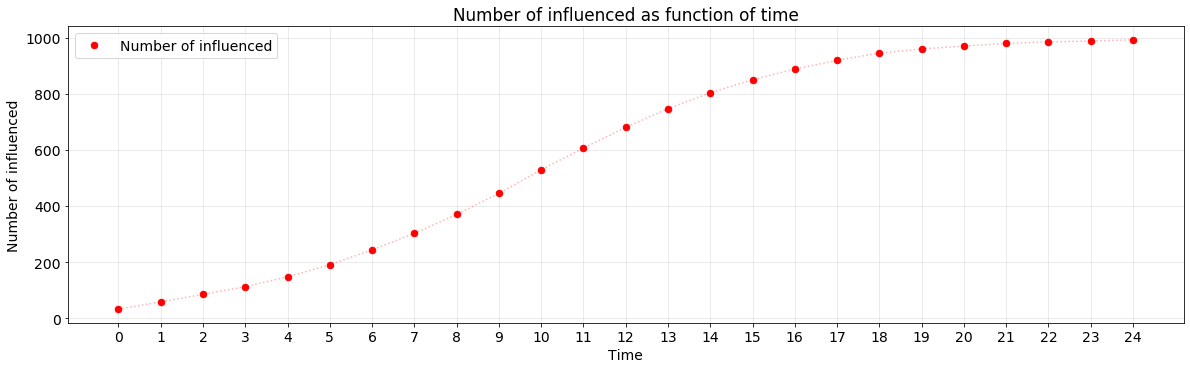

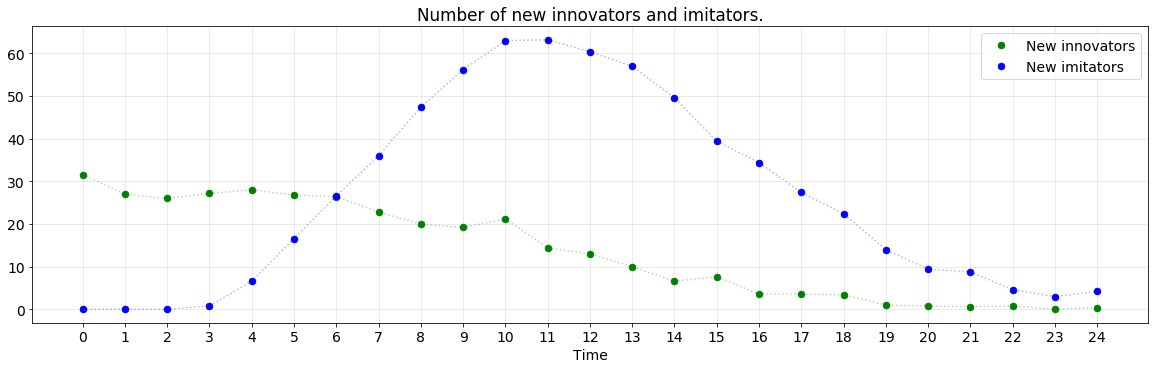

In [21]:
plt.subplot(2, 1, 1)
# Number of influenced.
plt.plot(n_influenced, 'r.', ms=13, label="Number of influenced")
plt.plot(n_influenced, 'r:', ms=13, alpha=0.3)
# Plot settings.
plt.xticks(range(MAX_TIME))
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Number of influenced")
plt.title("Number of influenced as function of time")
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
# Number of innovators.
plt.plot(n_innovators, 'g.', ms=13, label="New innovators")
plt.plot(n_innovators, 'g:', ms=13, alpha=0.3)
# Number of imitators.
plt.plot(n_imitators, 'b.', ms=13, label="New imitators")
plt.plot(n_imitators, 'b:', ms=13, alpha=0.3)
# Plot settings.
plt.xticks(range(MAX_TIME))
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("")
plt.title("Number of new innovators and imitators.")
plt.legend()
plt.show()

# Field visualization

In [17]:
# Simulation for the visualization needs
field = np.zeros(SIZE // 10)
fields = [field, ]
while not np.all(field == 1):
    field, n_innovators, n_imitators = update(field, 0.03, 0.3)
    coloured_field = field.copy()
    coloured_field[:n_innovators] = 0.5  # Change value to display different colour for innovators.
    fields.append(coloured_field)
fields = np.array(fields)

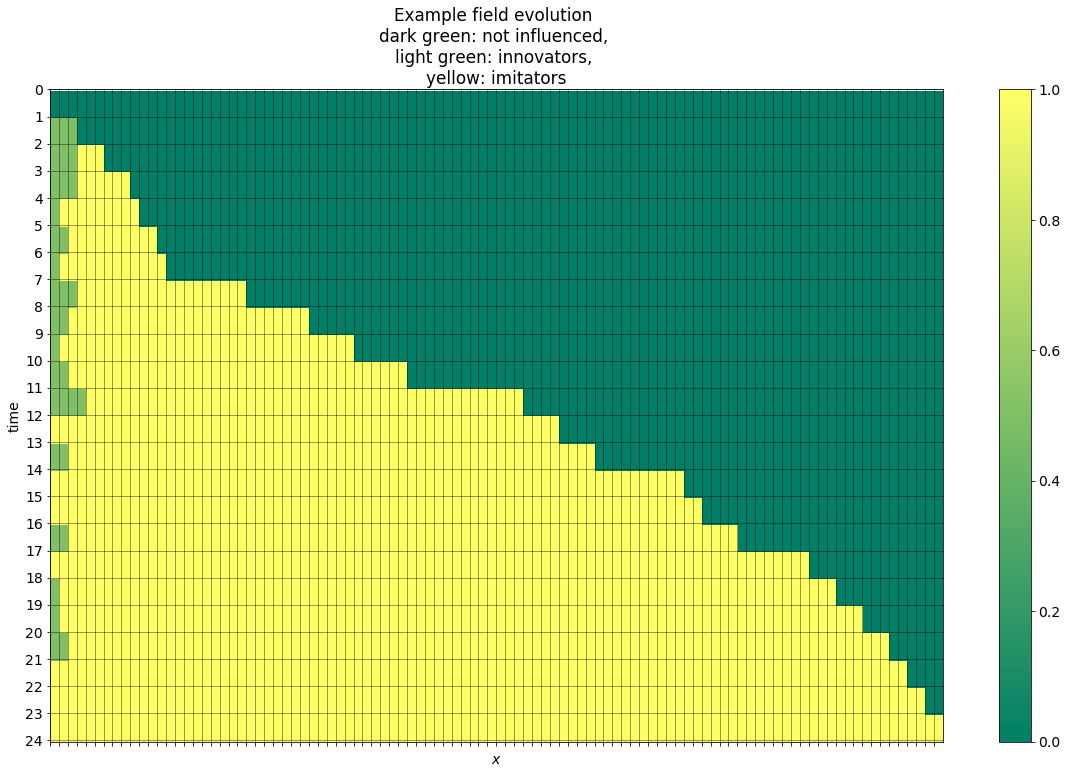

In [18]:
plt.imshow(fields, cmap='summer')
plt.gca().set_aspect('auto')
plt.colorbar()
# Ticks settings
plt.yticks(np.arange(len(fields) + 1) - .55, labels=np.arange(len(fields) + 1))
plt.xticks(np.arange(len(fields[0])) - .5, labels=[])
plt.grid(color='black', alpha=0.5)
# Labelling
plt.xlabel('$x$')
plt.ylabel('time')
plt.title('Example field evolution \ndark green: not influenced, \nlight green: innovators, \nyellow: imitators')
plt.show()